# House Cost Prediction in New York using ML

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('apartment_cost_list.csv')
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


## Data Preprocessing part 1

In [4]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Curb Cut              99.918421
Horizontal Enlrgmt    99.168919
Vertical Enlrgmt      98.766125
Fully Permitted       20.333452
Zoning Dist1          10.686789
dtype: float64

In [5]:
df.drop(columns=['Job #', 'House #', 'Curb Cut', 'Horizontal Enlrgmt', 'Vertical Enlrgmt'], inplace=True)
df.shape

(19613, 13)

In [6]:
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Fully Permitted           object
Initial Cost              object
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
dtype: object

In [7]:
df['Year'] = df['Fully Permitted'].str[-4:]
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,NaN,$65000.00,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,NaN
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,07/14/2020,$85000.00,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,05/23/2007,$60000.00,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,02/28/2006,$75000.00,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,09/29/2006,$40000.00,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [8]:
df.drop(columns=['Fully Permitted'], inplace=True)
df.shape

(19613, 13)

In [9]:
df['Initial Cost'] = df['Initial Cost'].str.replace('$', '').str.slice(stop=-3)
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,65000,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,NaN
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,85000,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,60000,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,75000,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,40000,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [10]:
df['Initial Cost'] = df['Initial Cost'].astype(int)
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
Year                      object
dtype: object

## Fill null value in year using predicted value from random Forest regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
import math
train_data = df.dropna()
test_data = df[df['Year'].isnull()]
regressor = RandomForestRegressor(n_estimators =100, random_state=42)
regressor.fit(train_data.index.values.reshape(-1,1),  train_data['Year'])
predictions = regressor.predict(test_data.index.values.reshape(-1,1))
predictions = [math.floor(p) for p in predictions]
df.loc[df['Year'].isnull(), 'Year'] = predictions
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,65000,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,2015
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,85000,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,60000,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,75000,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,40000,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [12]:
df['Year'] = df['Year'].astype(int)
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
Year                       int32
dtype: object

In [13]:
df.drop(columns=['Street Name', 'Block', 'Bin #', 'Job Description', 'Zoning Dist1'], inplace=True)

In [14]:
df.duplicated().sum()

6684

In [15]:
df = df.drop_duplicates()
df.shape

(12929, 8)

## Exploratory Data Analysis

In [16]:
df.select_dtypes(include='object').nunique()

Borough     5
Job Type    3
dtype: int64

C:\Users\Shehan\AppData\Local\Temp\ipykernel_53852\1683729404.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_53852\1683729404.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


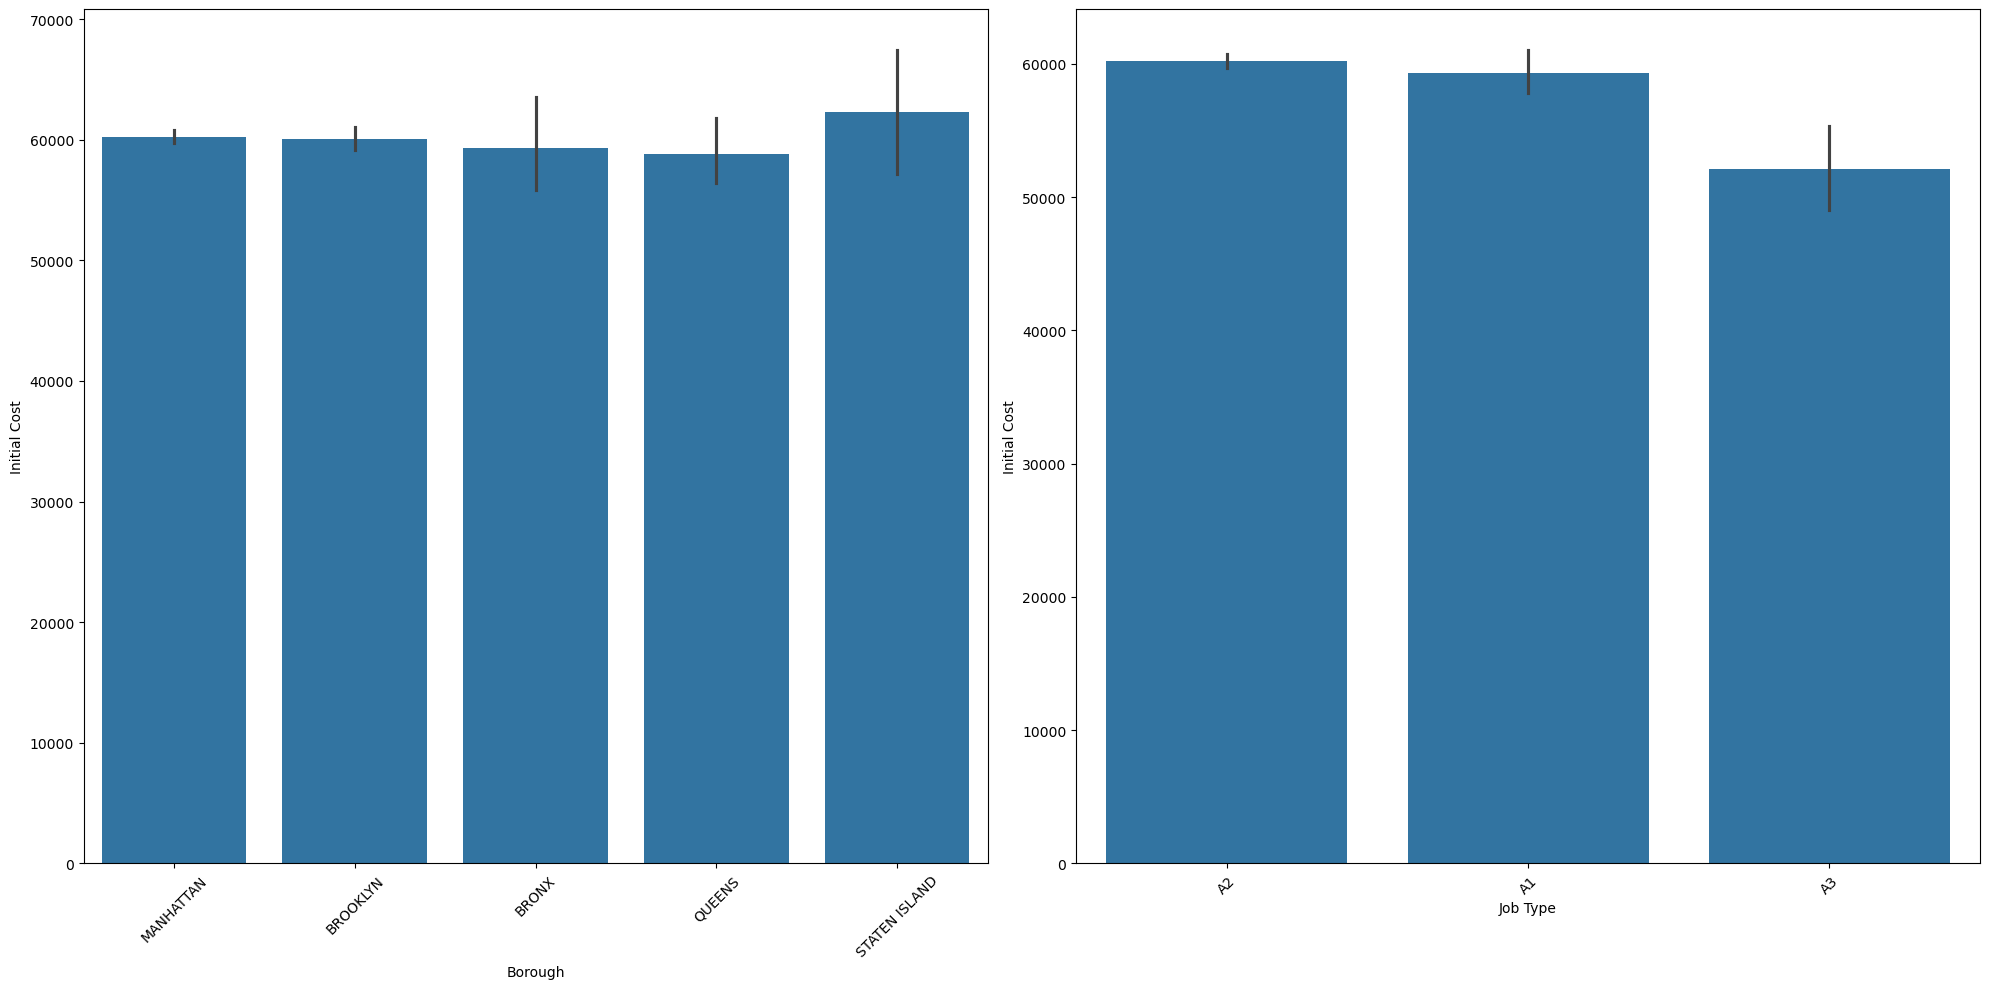

In [18]:
# list of categorical variables to plot
cat_vars = ['Borough', 'Job Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Initial Cost', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [19]:
df.select_dtypes(include='int').nunique()

Lot                       265
Community - Board          59
Initial Cost               46
Proposed Zoning Sqft      331
Enlargement SQ Footage    229
Year                       23
dtype: int64

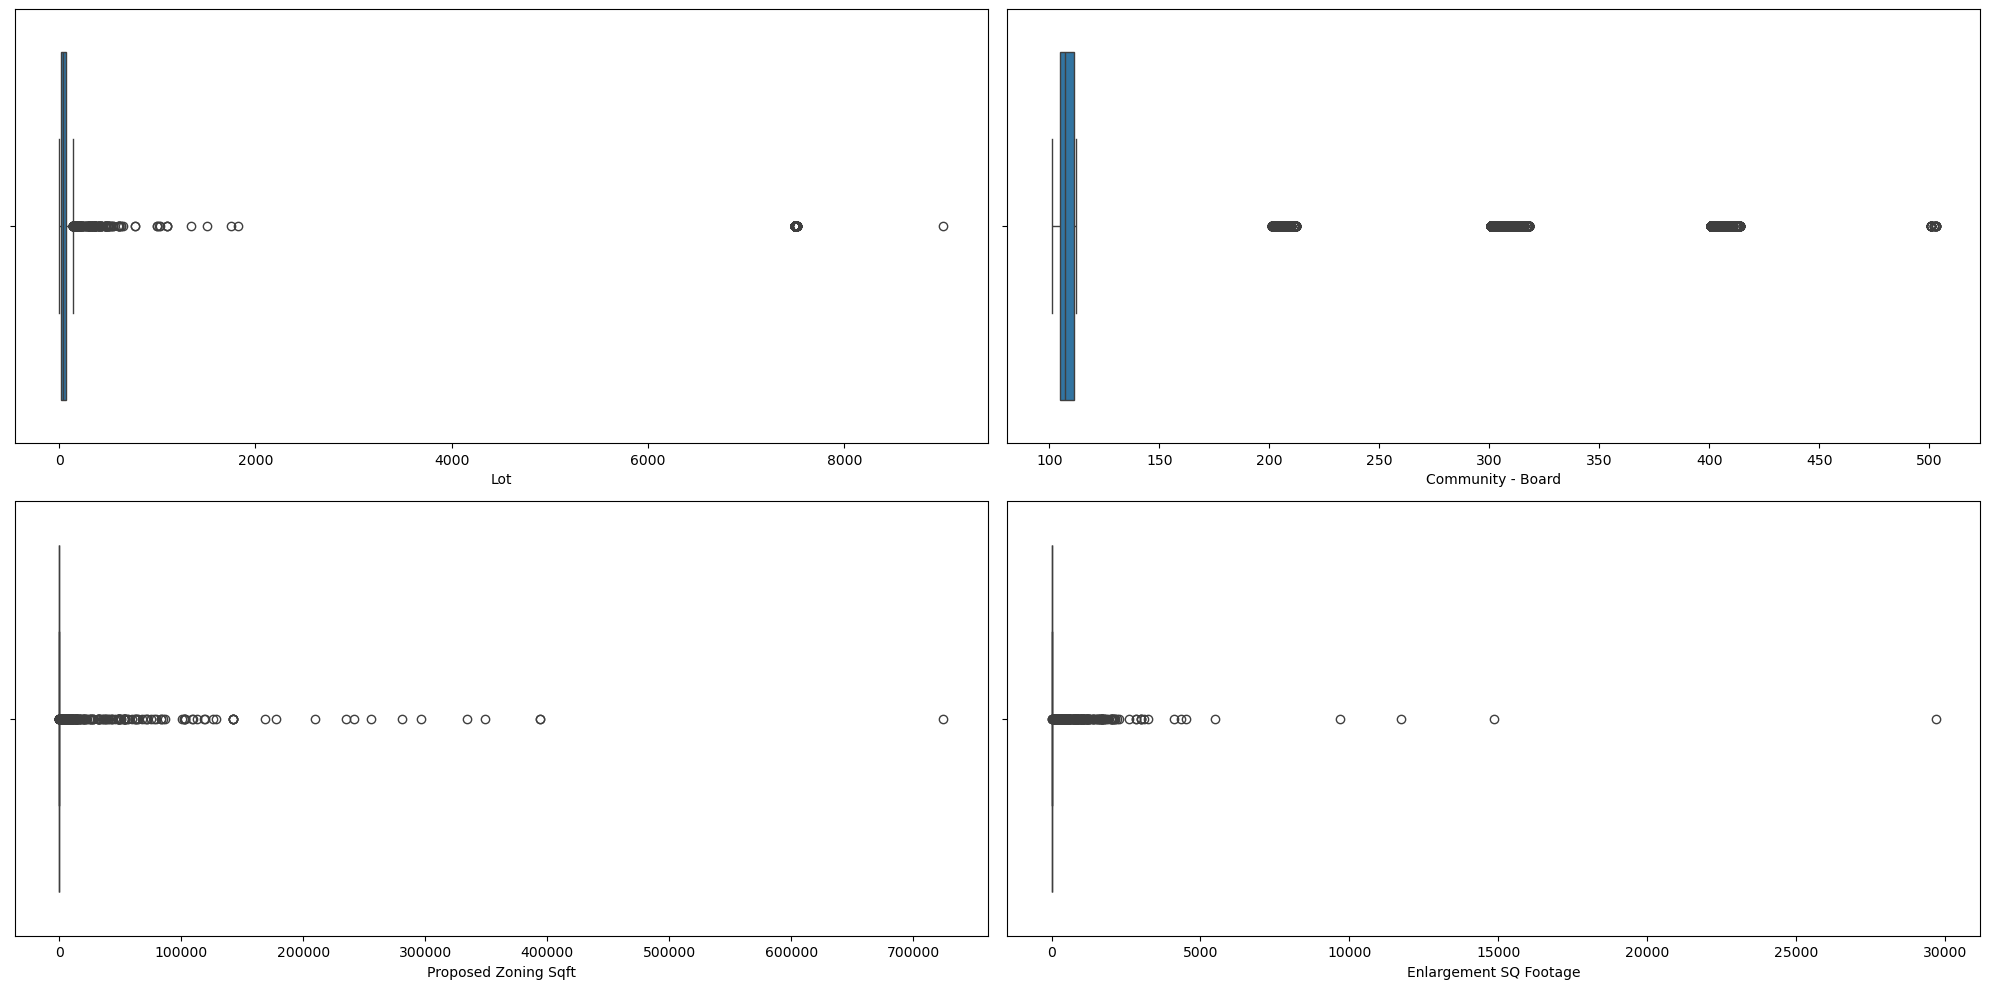

In [20]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

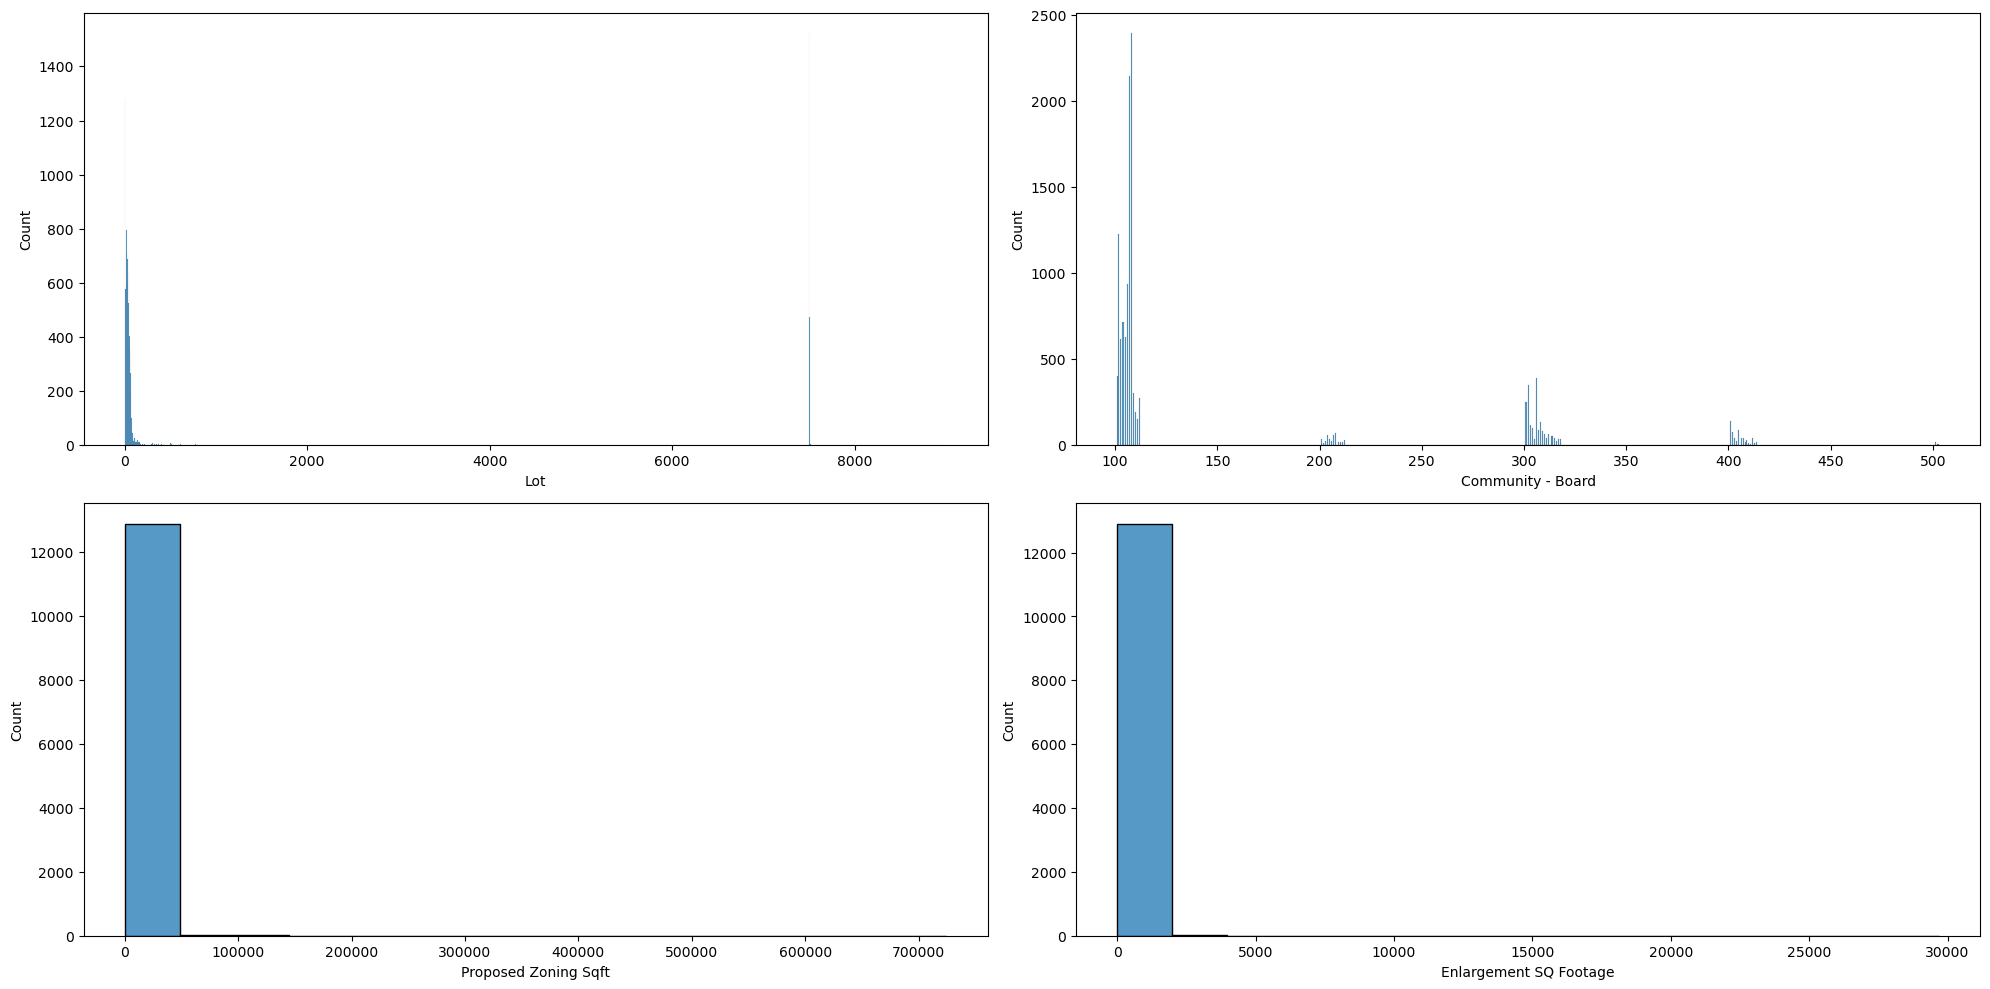

In [21]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

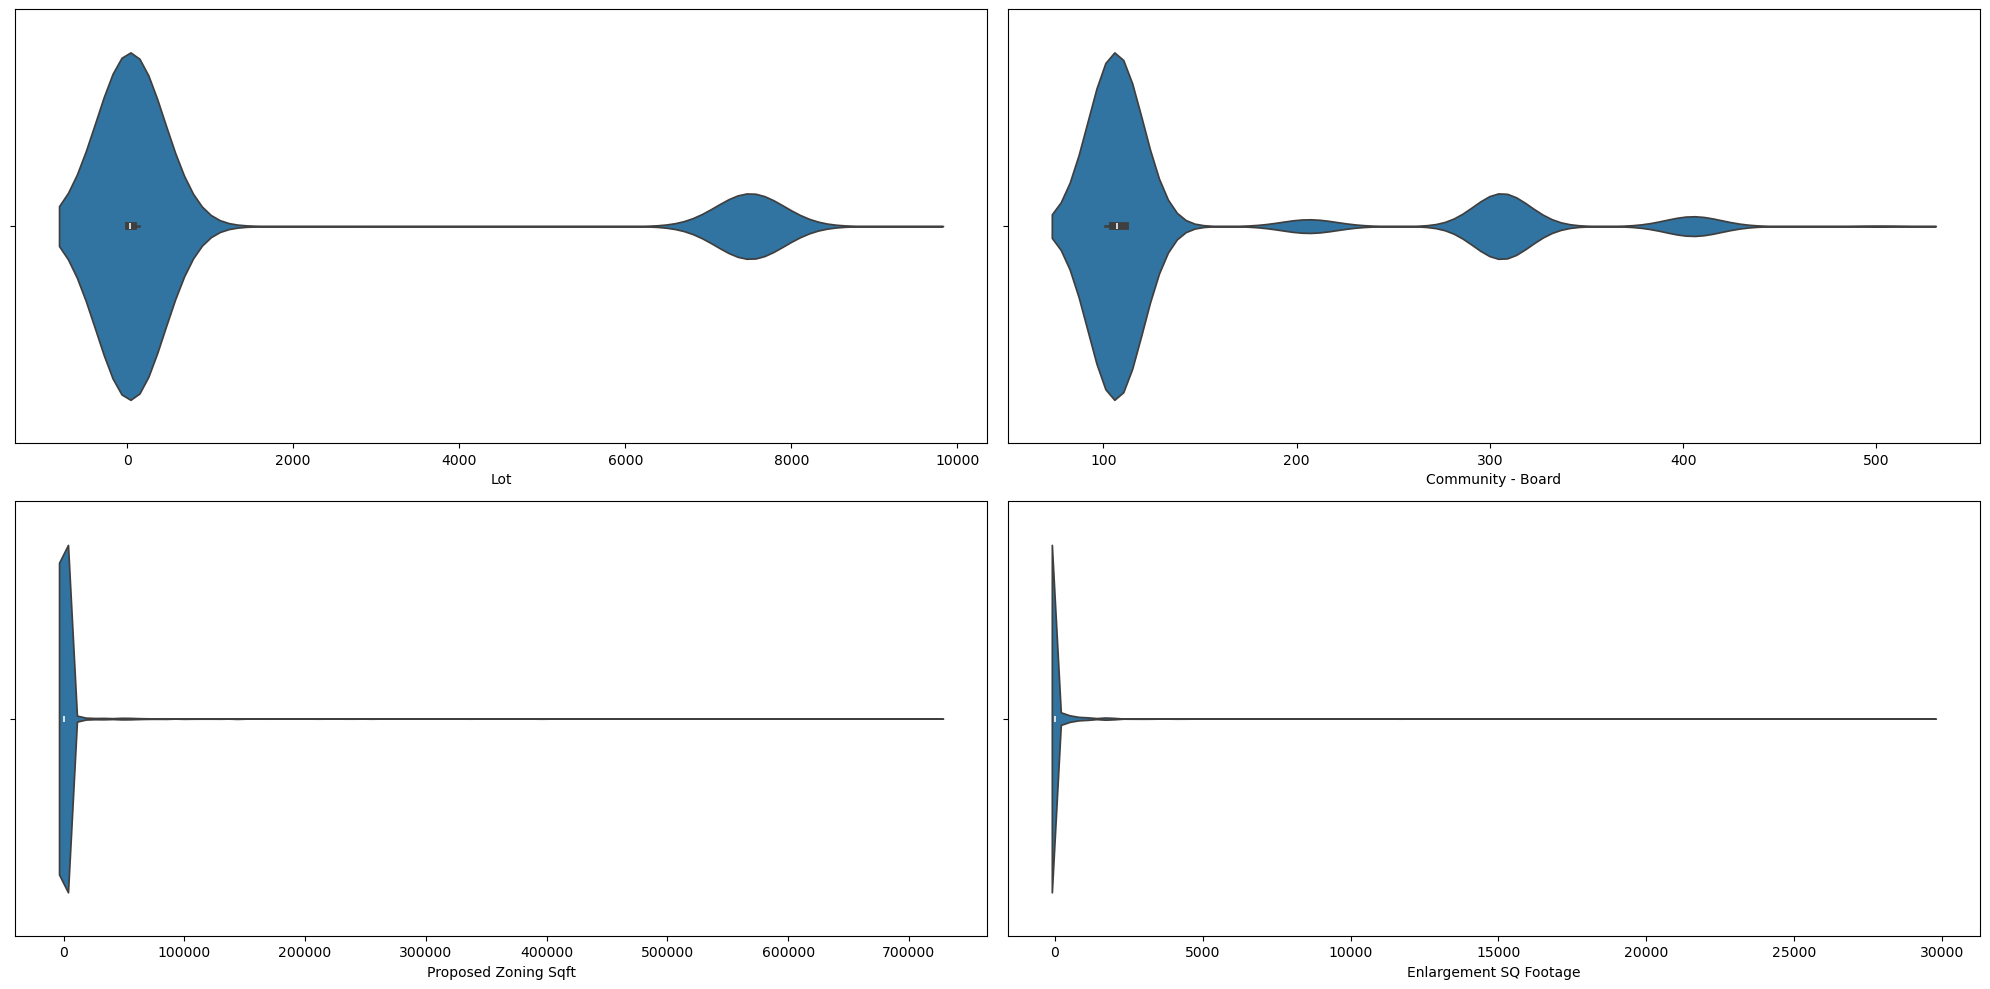

In [22]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

C:\Users\Shehan\AppData\Local\Temp\ipykernel_53852\2710696996.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Initial Cost', hue='Borough', data=df, ci=None, estimator='mean', alpha=0.7)


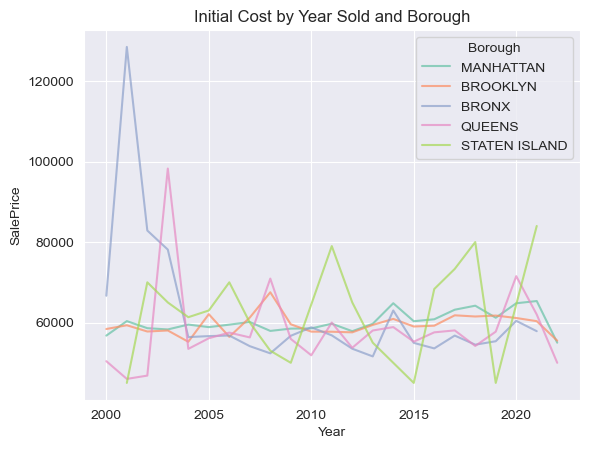

In [23]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Initial Cost', hue='Borough', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Initial Cost by Year Sold and Borough")
plt.xlabel("Year")
plt.ylabel("SalePrice")

plt.show()

## Data Preprocessing part 2

In [24]:
df.head()

,Borough,Lot,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Year
0,MANHATTAN,49,A2,108,65000,0,0,2015
1,MANHATTAN,43,A2,108,85000,0,0,2020
2,BROOKLYN,86,A1,302,60000,0,0,2007
3,BROOKLYN,35,A2,314,75000,0,0,2006
4,BROOKLYN,10,A1,301,40000,0,0,2006


In [25]:
df.dtypes

Borough                   object
Lot                        int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Year                       int32
dtype: object

In [26]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Borough: ['MANHATTAN' 'BROOKLYN' 'BRONX' 'QUEENS' 'STATEN ISLAND']
Job Type: ['A2' 'A1' 'A3']


In [27]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Borough: [2 1 0 3 4]
Job Type: [1 0 2]


## remove outlier using IQR , because there are alot of high values

In [28]:
# define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# specify the columns to remove outliers from
columns_to_check = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

# call the function to remove outliers using IQR
df_clean = remove_outliers_iqr(df, columns_to_check)

# print the resulting dataframe
df_clean.head()

,Borough,Lot,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Year
0,2,49,1,108,65000,0,0,2015
1,2,43,1,108,85000,0,0,2020
2,1,86,0,302,60000,0,0,2007
3,1,35,1,314,75000,0,0,2006
4,1,10,0,301,40000,0,0,2006


In [29]:
df_clean.shape

(9605, 8)

<Axes: >

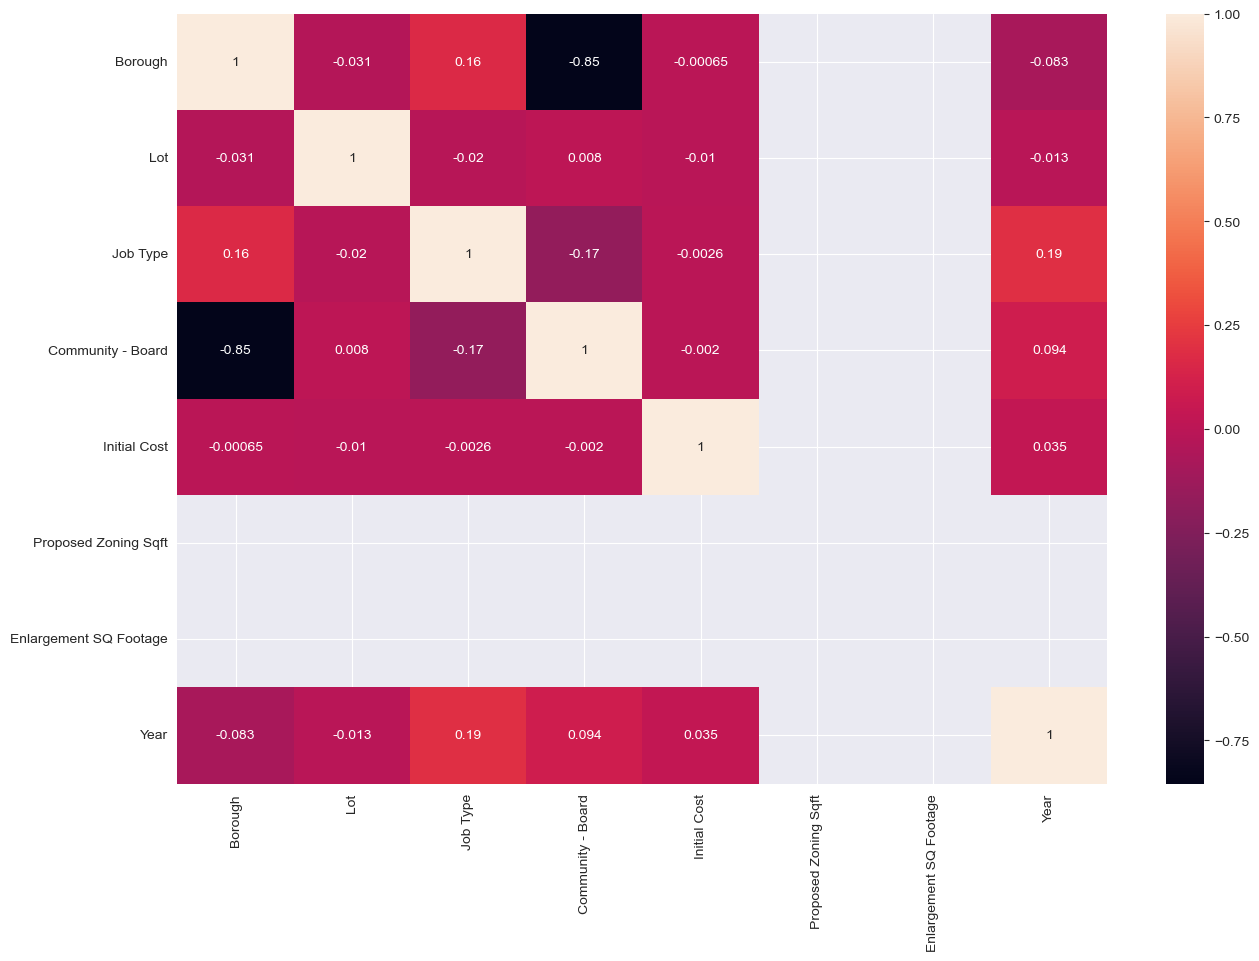

In [31]:
#Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean.corr(method='pearson'), fmt='.2g', annot=True)

In [32]:
df_clean.drop(columns=['Proposed Zoning Sqft', 'Enlargement SQ Footage'], inplace=True)

## Machine Learning Model

In [33]:
X = df_clean.drop('Initial Cost', axis=1)
y = df_clean['Initial Cost']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


# Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8}


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shehan\anaconda3\Lib\site-p

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=2, max_features='log2', min_samples_leaf=1, min_samples_split=4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='log2', min_samples_split=4,
                      random_state=0)

In [39]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12326.045367413335
MAPE is 0.2194045066760006
MSE is 456702110.6384338
R2 score is -0.0061862178832226
RMSE score is 21370.58985237501


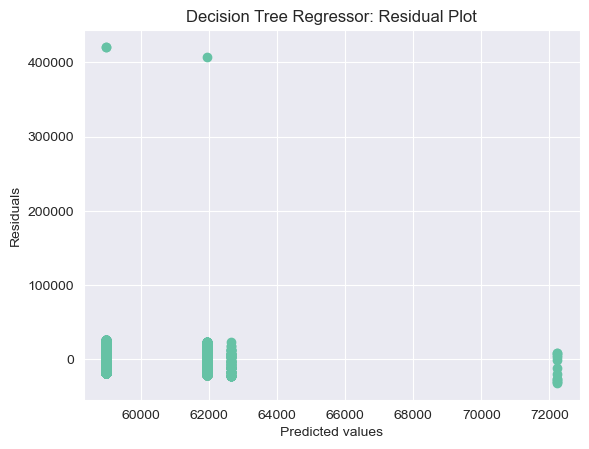

In [40]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Regressor: Residual Plot")
plt.show()

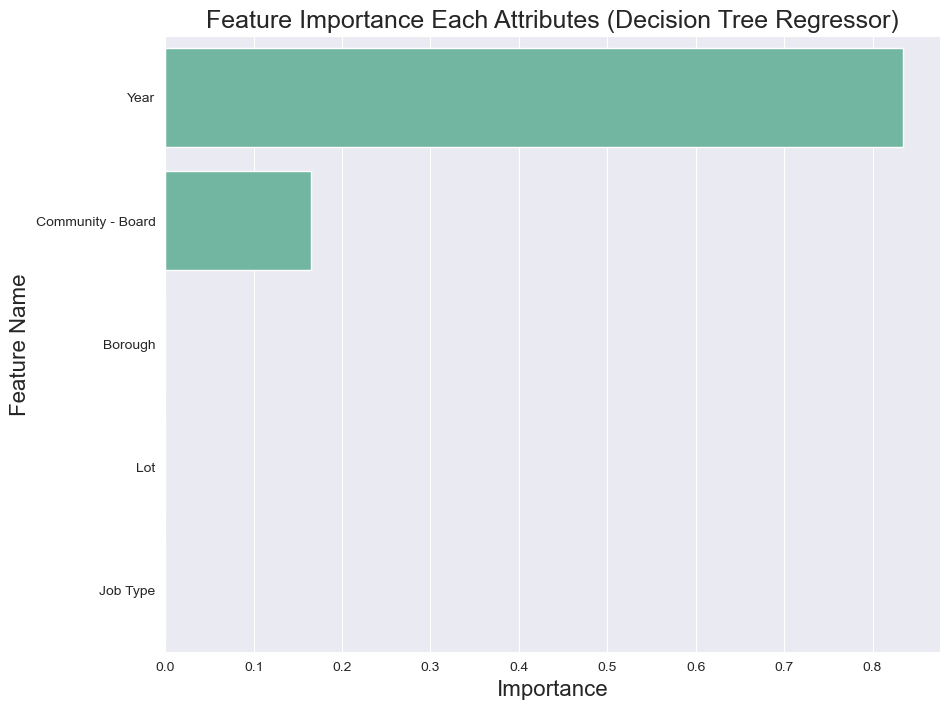

In [41]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

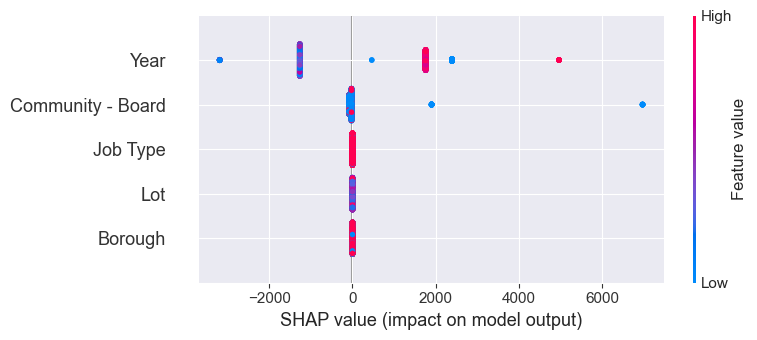

In [42]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shehan\anaconda3\Lib\site-p

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=3, min_samples_split=2, min_samples_leaf=2, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      random_state=0)

In [46]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12251.982441343154
MAPE is 0.21794866663436158
MSE is 452763871.07805496
R2 score is 0.002490340153341486
RMSE score is 21278.248778460482


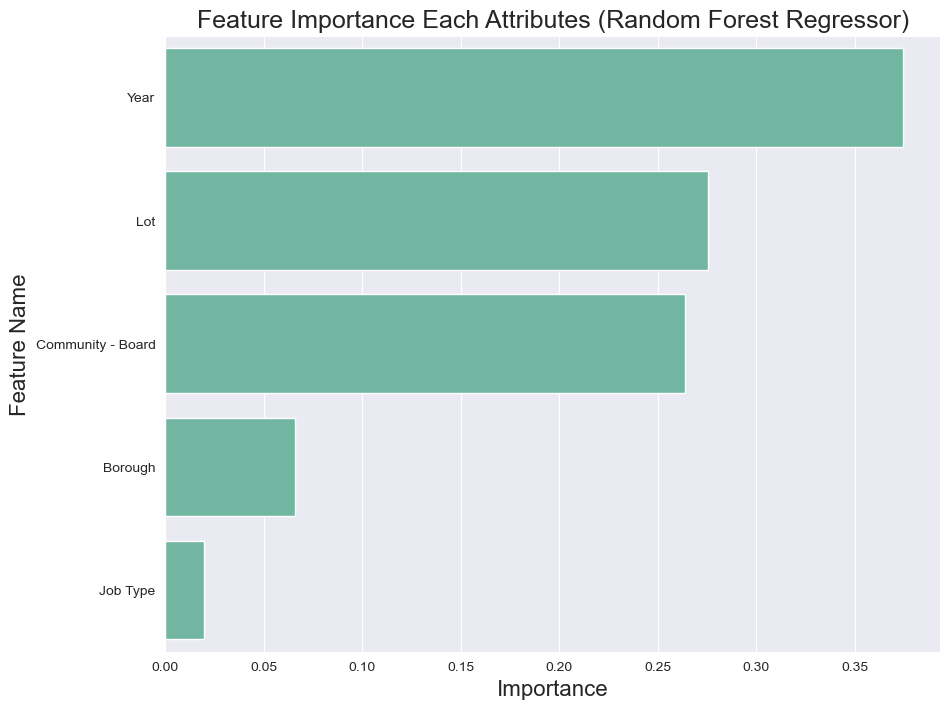

In [47]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

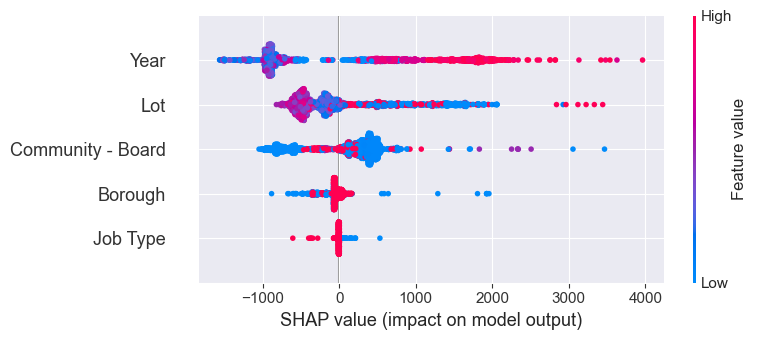

In [48]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# AdaBoost Regressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost Regressor object
ada = AdaBoostRegressor()

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 1]}

# Create a GridSearchCV object
grid = GridSearchCV(ada, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 50}


In [50]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.01)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01)

In [51]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12407.649422866023
MAPE is 0.22397343656899404
MSE is 457975920.95821697
R2 score is -0.00899262135302803
RMSE score is 21400.371981772114


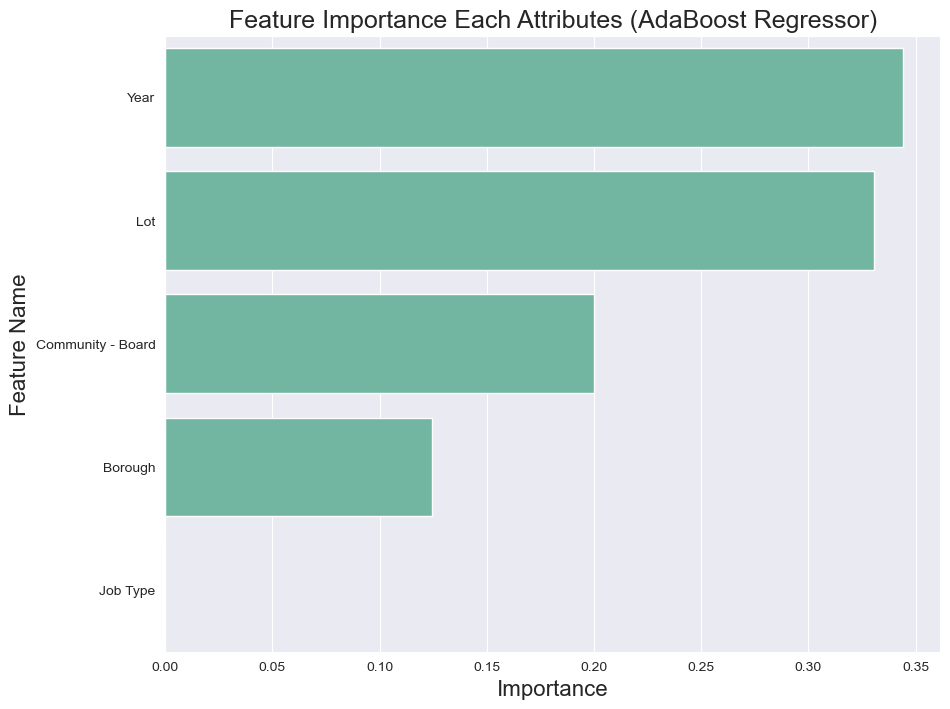

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()